# DVS Individual Project

Submitted by: Joseph Matthew R. Azanza

**Instructions:**

1. Select your own dataset.  
2. Create your Exploratory Data Analysis using at least 1 viz in MATPLOTLIB, 1 viz using seaborn, and 1 viz using dataframe plots. Make sure you have proper title, xlabel, and ylabel. Share some of your observations per graph  
3. Create your final visualization with a short storytelling. You can do this in the notebook (even reuse your EDA viz) or create a separate file. Note the viz in your final visualization should apply all that we have discussed about proper data viz.

## Dataset

In this notebook, we are interested in exploring video games sales data obtained from Kaggle: [Video Game Sales with Ratings](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings)

In [1]:
# Importing all the necessary libraries for analysis
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Loading the dataset and showing the first few rows

vg = pd.read_csv('vgsales-22-12-2016.csv')
vg.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


### Dataset Columns

To maximize our utilization of the dataset, we need to understand what each column contains. The descriptions below are lifted from the documentation of the dataset in Kaggle, but also adjusted for easier understanding (description adjusment is based on my experience).


|Column No.|Column Name|Description|
|:---:|:--- |:--- |
|1|Name|Name of the game|
|2|Platform|Console on which the game is running|
|3|Year_of_Release|Year of game released|
|4|Genre|Specific game type/categorization|
|5|Publisher|Game publisher|
|6|NA_Sales|Game sales in North America (in millions of units)|
|7|EU_Sales|Game sales in the European Union (in millions of units)|
|8|JP_Sales|Game sales in Japan (in millions of units)|
|9|Other_Sales|Game sales in the rest of the world, excluding Japan, Europe and North America (in millions of units)|
|10|Global_Sales|Total sales in the world (in millions of units)|
|11|Critic_Score|Aggregate score compiled by Metacritic staff|
|12|Critic_Count|The number of critics used in coming up with the Critic_score|
|13|User_Score|Aggregate score by Metacritic's subscribers|
|14|User_Count|Number of users who gave the user_score|
|15|Developer|Party responsible for creating the game|
|16|Rating|The ESRB ratings (E.g. Everyone, Teen, Adults Only..etc)|

From the column names and descriptions, we can roughly divide the dataset into three "*super categories*". Referring to this categories will make life easier in terms of referencing them and data assessment

|Category|Column Inclusions|Column Numbers|
|:---:|:---:|:---:|
|**Identifiers**|from `Name` to `Publisher`|Columns 1 to 5|
|**Sales Data**|from `NA_Sales` to `Global_Sales`|Columns 6 to 10|
|**Ratings Data**|from `Critic_Score` to `Rating`|Columns 11 to 16|

In [3]:
# Get how many rows and columns are in the dataset
vg.shape

(16719, 16)

In [4]:
vg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


### Dataset Columns observations:

Our dataset has 16,719 rows with 16 columns. The results of `vg.info()` show us the data type per column, as well as how many non-nulls are in each column. Above, we can see that all `sales data` per region are populated completely, while the `identifiers` data are around 90+% complete. Unfortunately, the `ratings data` are poorly populated, with roughly around 50% population rate.

In terms of utilization, our insights and storytelling would most likely focus on the `identifiers` and `sales data`, with sparse support from the `ratings data` whenever applicable.

## Exploratory Data Analysis


### Sales by Region
To start the EDA, I am curious at how the sales in each region stack against one another. We can assess this by creating a pie chart:

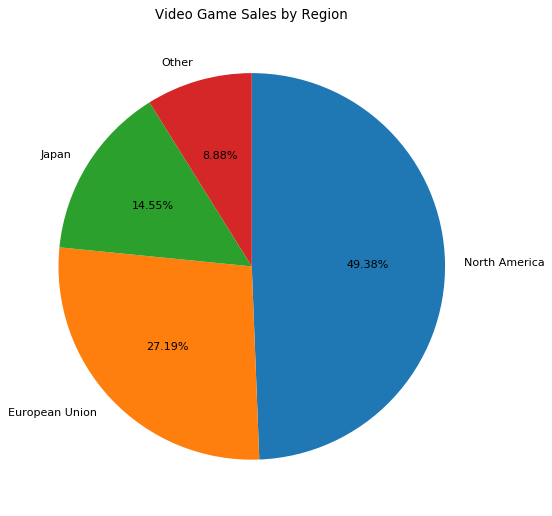

In [5]:
# Data Preparation
region_sales = (vg[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
                .sum().reset_index())
region_sales.columns = ['Region','Sales']
region_sales['Region'] = ['North America', 'European Union', 'Japan', 'Other']


# Plotting
plt.figure(figsize=[12,8], dpi=80)
plt.pie(region_sales['Sales'], labels=region_sales['Region'], 
        startangle=90, autopct='%.2f%%', counterclock=False)
plt.title('Video Game Sales by Region')
plt.show()

### Sales by Region: Observations and Insights

From the piechart above, we can see that North America has the largest market share, with around 49.38%. North America is followed by the European Union, with 27.19% market share, next is Japan, with 14.55% market share, and finally, the rest of the world, with 8.88% market share.

This distribution is a surprise for me. Playing video games is my passion and I was expecting Japan to have a bigger market share, with at least 30 to 40%, because many of the publishers I know and the games that are popular originated from Japan. It's interesting to see that they only have around 15%.

### Sales by Region and by Genre

Based on the market share above, I am now curious as to why North America and the European Union have more sales than Japan. Does it have something to do with what the popular genres per region are?

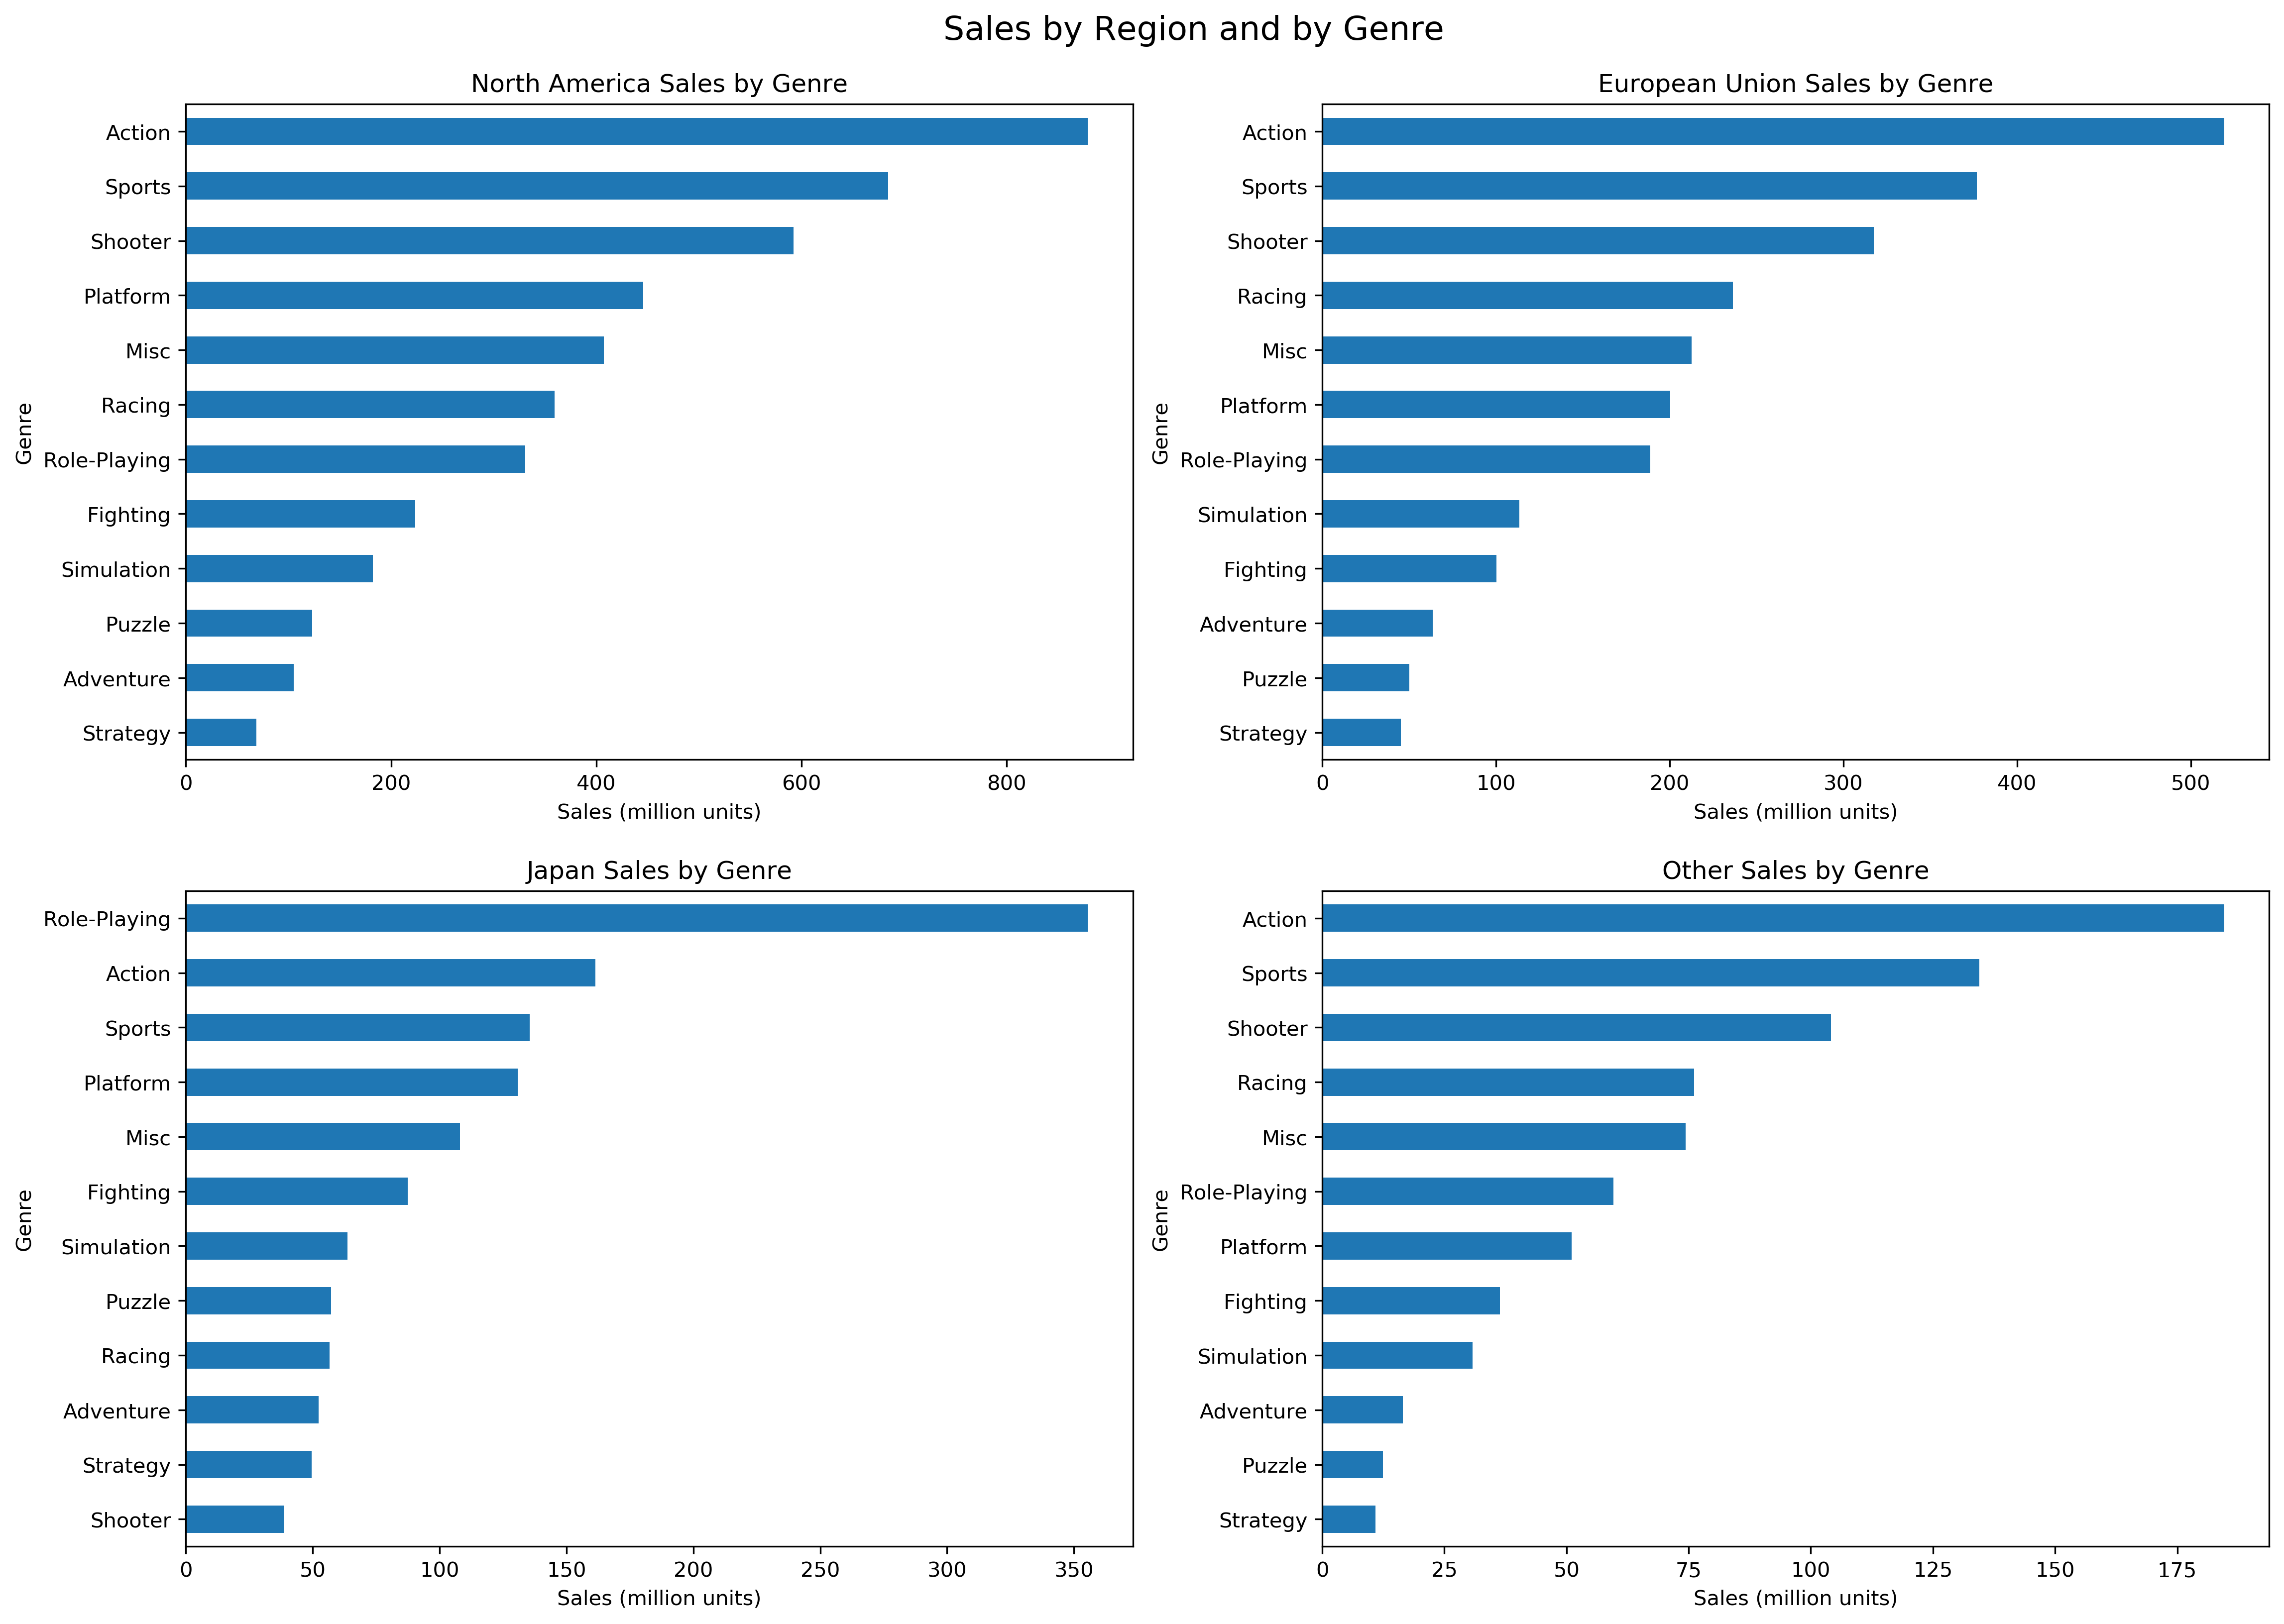

In [6]:
# Data Prep
genre = (vg[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
         .groupby(['Genre'],as_index=True).sum())

# Plot Setup
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, 
                                             figsize=(18,12), dpi=300)
fig.subplots_adjust(top=0.93)
fig.suptitle('Sales by Region and by Genre', size=16)

# Plotting
genre['NA_Sales'].sort_values().plot.barh(stacked="True", 
                                          title='North America Sales by Genre',
                                          rot=0, ax=ax1)
ax1.set_xlabel('Sales (million units)')

genre['EU_Sales'].sort_values().plot.barh(stacked="True", 
                                          title='European Union Sales by Genre', 
                                          rot=0, ax=ax2)
ax2.set_xlabel('Sales (million units)')

genre['JP_Sales'].sort_values().plot.barh(stacked="True", 
                                          title='Japan Sales by Genre', 
                                          rot=0, ax=ax3)
ax3.set_xlabel('Sales (million units)')

genre['Other_Sales'].sort_values().plot.barh(stacked="True", 
                                             title='Other Sales by Genre', 
                                             rot=0, ax=ax4)
ax4.set_xlabel('Sales (million units)')

plt.show()



### Sales by Region and by Genre: Observations and Insights

Answering the question above, it turns out that the Japan is a unique case and their preferences don't follow the rest of the world. The most popular games in Japan belongs to the `Role-Playing` genre while the rest of the world likes `Action`. 

If we look at where `Role-playing` ranks for outside of Japan, we can see that it is 7th for North America and the European Union, while it is 6th for the rest of the world. Interestingly enough, this may have been the reason why I was expecting Japan to have a larger market share. I grew up playing mostly RPGs and my mindset might be similar to how the Japanese think. From what I know, majority of role-playing games, especially the famous ones, originated from Japan and that may be the reason why this particular genre is the most popular in their country.

Anyway going back to the data, I also noticed that the top 3 genres for North America, European Union, and the rest of the world are the same, namely: `Action`, `Sports`, `Shooter`. For Japan, `Action` and `Sports` also rank within their top 3, but interestingly enough, they like `Shooter` games the least.

### Top 10 Games in Japan by Genre

Playing to my strengths, interest, and domain knowledge, I'd like to turn my focus into Japan and see which games are the most popular in terms of sales and what are the genre of these games.

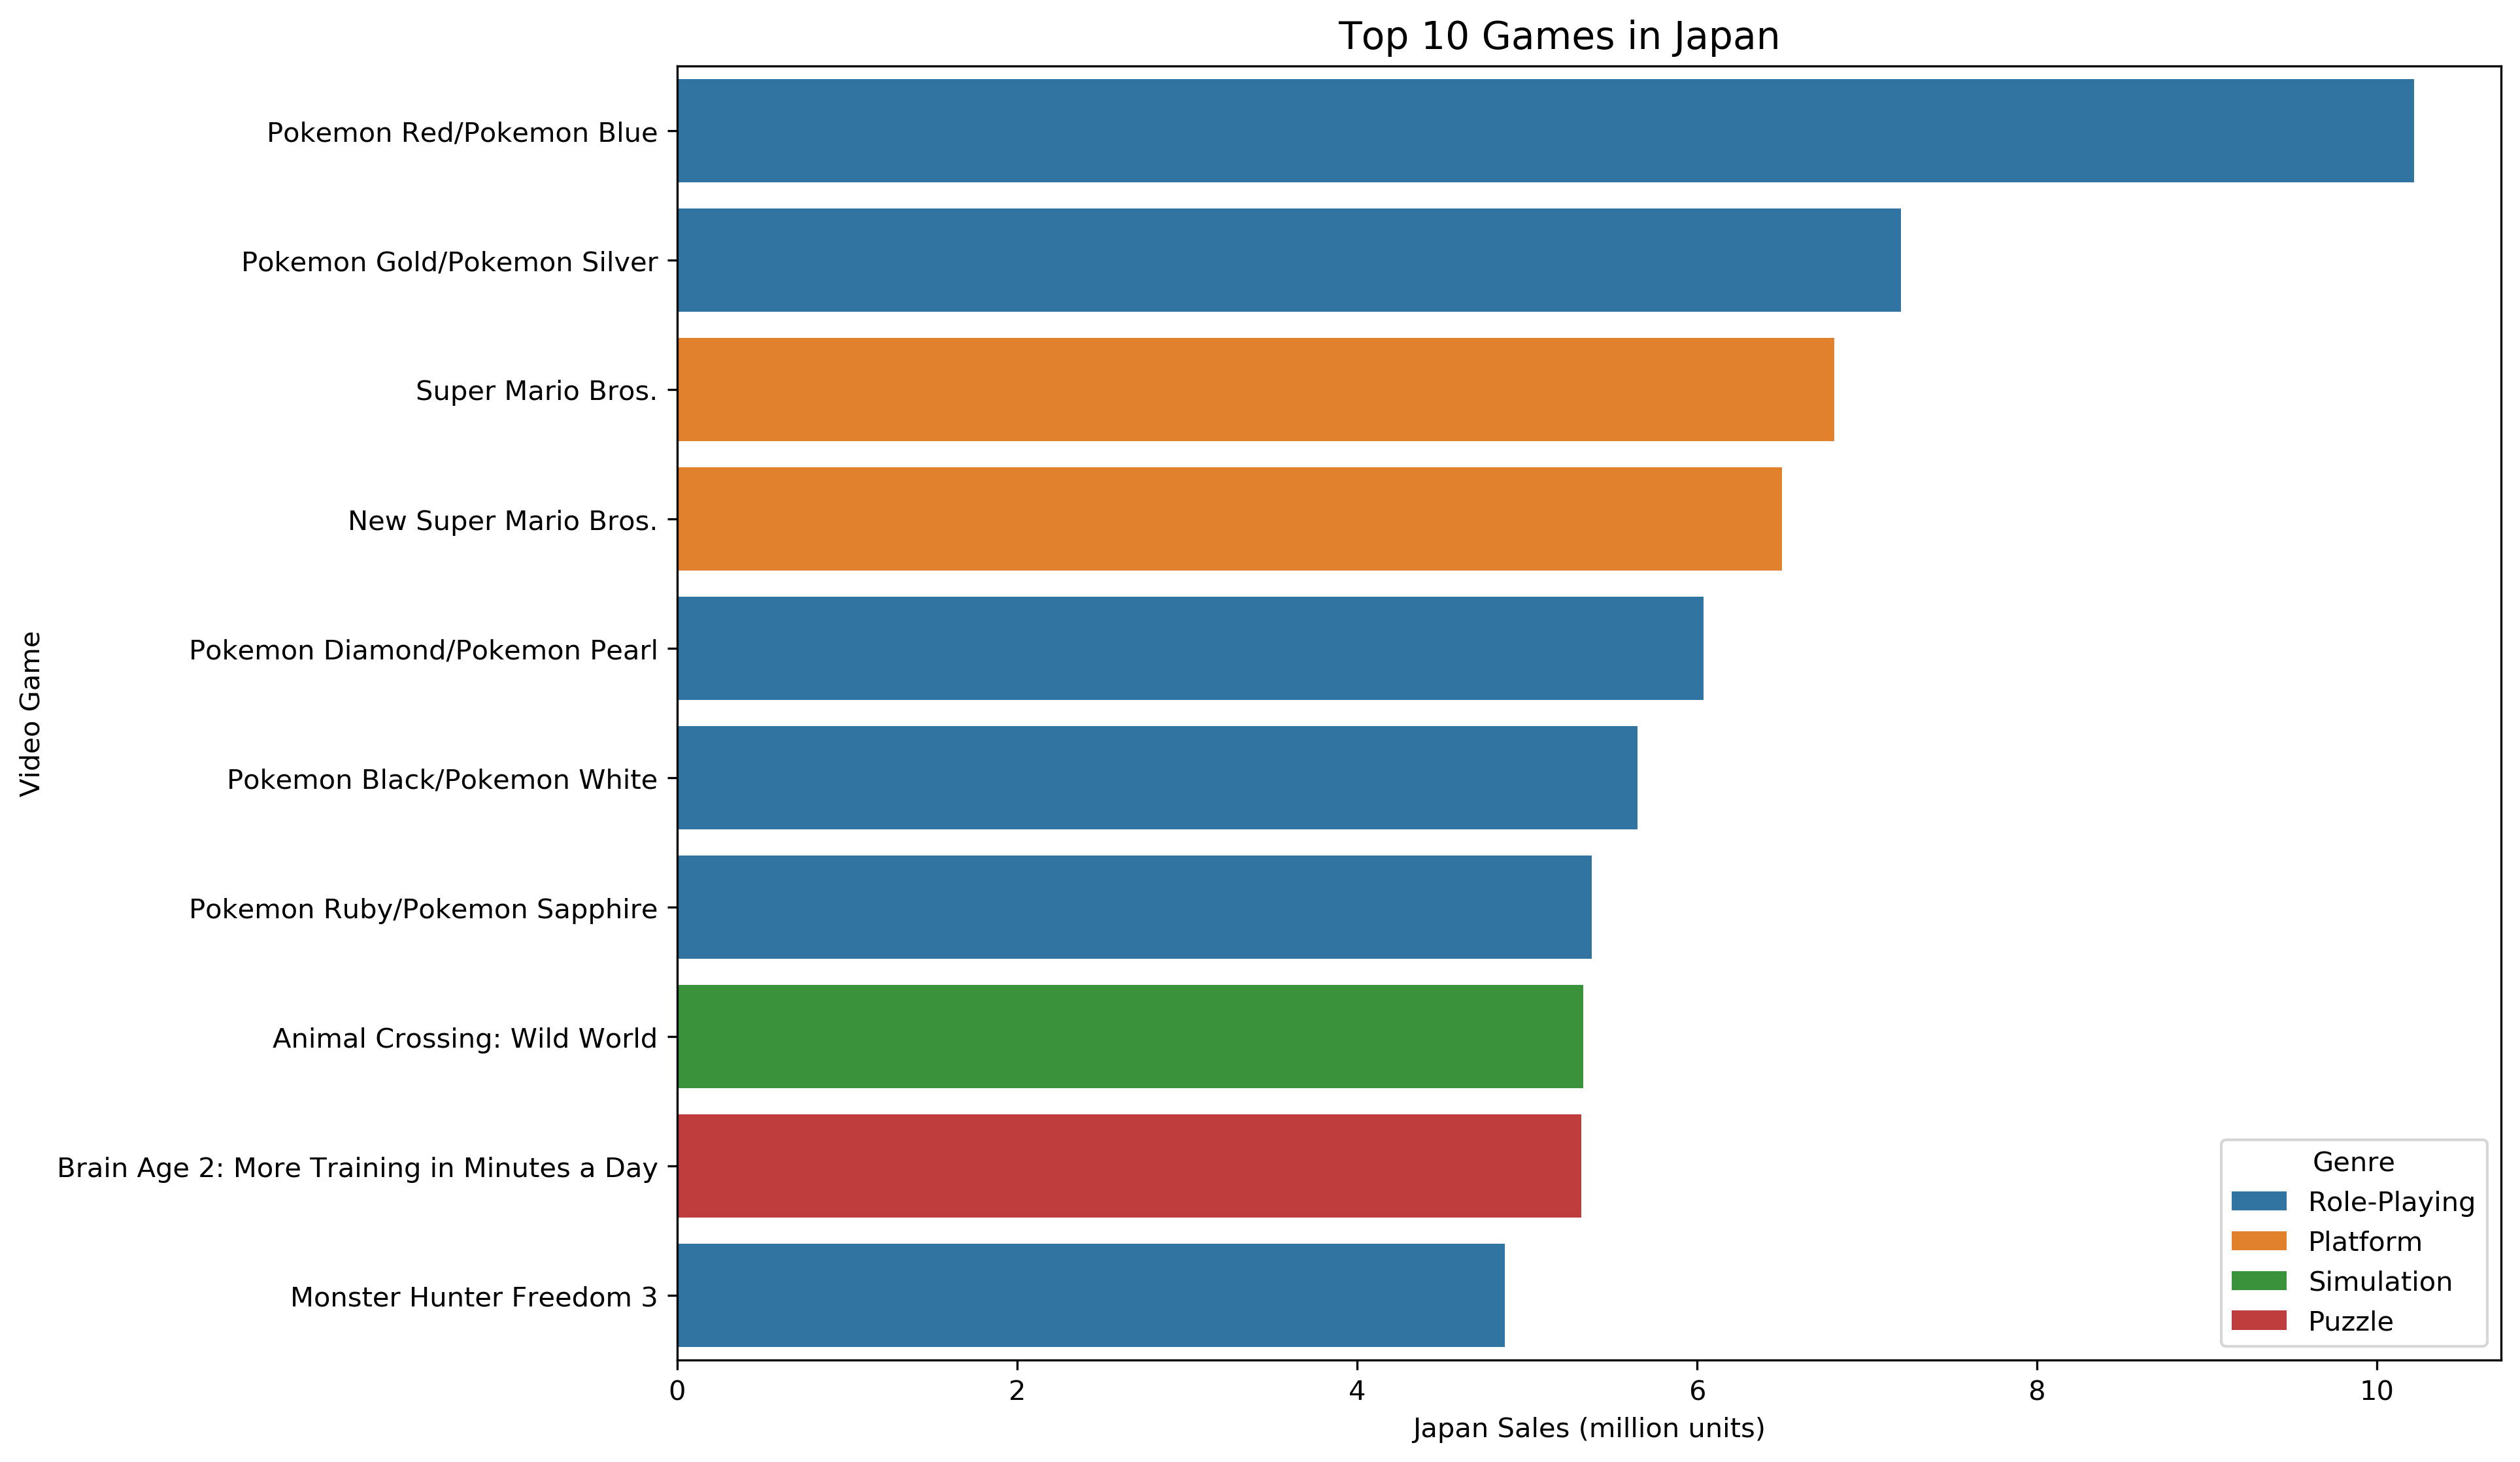

In [7]:
#Data Preparation
top_japan = vg[['Name','Genre','JP_Sales']].nlargest(10,'JP_Sales')

#Plotting

plt.figure(figsize=[12,8], dpi=300)
plt.suptitle('Top 10 Games in Japan',size=14)
plt.subplots_adjust(top=0.95)
ax = sns.barplot(x='JP_Sales',y='Name', hue='Genre', data=top_japan, 
                 orient='h', dodge=False)
ax.set_xlabel('Japan Sales (million units)')
ax.set_ylabel('Video Game')
plt.show()

### Top Games in Japan by Genre: Observations

In a not so surprising turn of events, 6 out of the top 10 most famous games in Japan are `Role-Playing` games. The remaining 4 are: 2 `Platform` games, 1 `Simulation` game, and 1 `Puzzle` game.

Looking at the games, it turns out that 5 out of the 10 most famous games are `Pokemon` games. This line of games is published by `Nintendo`, and if my memory serves me right, the remaining 4 are also published by `Nintendo`, except for `Monster Hunter Freedom 3`. 

Seeing that the top 10 games within Japan are published by just one company, it makes me wonder how large their market share is and who are their competitors.

My Predictions at the top of my head: `Square Enix`, `Capcom`, and `Sega`. 

### Confirmation that 9 out of 10 top games are published by Nintendo:

In [8]:
# Confirmation that the 9 out of the top 10 games are published by Nintendo:

top_japan_with_publisher = (vg[['Name','Genre','Publisher','JP_Sales',]]
                            .nlargest(10,'JP_Sales'))
top_japan_with_publisher

,Name,Genre,Publisher,JP_Sales
4,Pokemon Red/Pokemon Blue,Role-Playing,Nintendo,10.22
12,Pokemon Gold/Pokemon Silver,Role-Playing,Nintendo,7.20
1,Super Mario Bros.,Platform,Nintendo,6.81
6,New Super Mario Bros.,Platform,Nintendo,6.50
20,Pokemon Diamond/Pokemon Pearl,Role-Playing,Nintendo,6.04
27,Pokemon Black/Pokemon White,Role-Playing,Nintendo,5.65
25,Pokemon Ruby/Pokemon Sapphire,Role-Playing,Nintendo,5.38
43,Animal Crossing: Wild World,Simulation,Nintendo,5.33
26,Brain Age 2: More Training in Minutes a Day,Puzzle,Nintendo,5.32
215,Monster Hunter Freedom 3,Role-Playing,Capcom,4.87


### Top Publishers in Japan by Sales:

Here, we try to identify how large the marketshare of Nintendo is and who are their competitors *(i.e if my predictions and memory are correct)*.

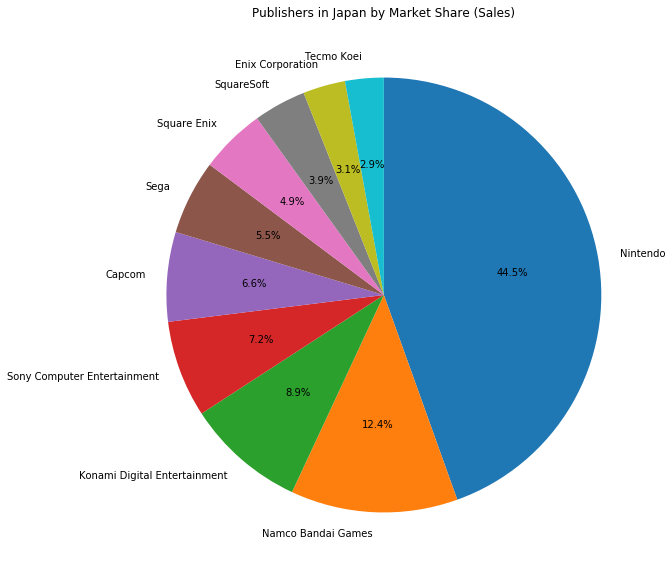

In [9]:
# Data Preparation
publisher_JP = (vg[['Publisher','JP_Sales']]
                .groupby(['Publisher'],as_index=False)
                .sum().nlargest(10,'JP_Sales'))
publisher_JP.columns = ['Publisher', 'Sales']
publisher_JP = publisher_JP.set_index('Publisher').squeeze()

# Plotting
publisher_JP.plot.pie(figsize=[10,10], 
                      title='Publishers in Japan by Market Share (Sales)',
                      startangle=90, autopct='%.1f%%', counterclock=False)
plt.ylabel('')
plt.show()

### Top Publishers in Japan by Sales: Observations and Insights

As I previously stated, my predicted competitors of `Nintendo` are: `Square Enix`, `Capcom`, `Sega`. Turns out I'm right. These three are among the top 10 publishers in Japan by sales with market share of  4.9%, 6.6%, and 5.5% respectively. Compared to `Nintendo`'s market share of 44.5%, these three are dwarfed in comparison.

`Nintendo`'s market share is similar to how North America accounts for almost 50% of global sales. We can say that they control half of the Japanese market. Even `Namco Bandai Games`, who ranks next to `Nintendo` with 12.4% market share, is dwarfed in comparison. From this, we can say that `Nintendo` is in a league of its own.

### Top 5 Global Publishers in the World and Top 5 Publishers per Region

I'm curious on which companies are the top `Publishers` globally and in the other regions. How do the top 5 companies in Japan compare globally and in the other regions? Are they even included in the top 5?

*Note: Reduced from 10 to 5 for brevity*

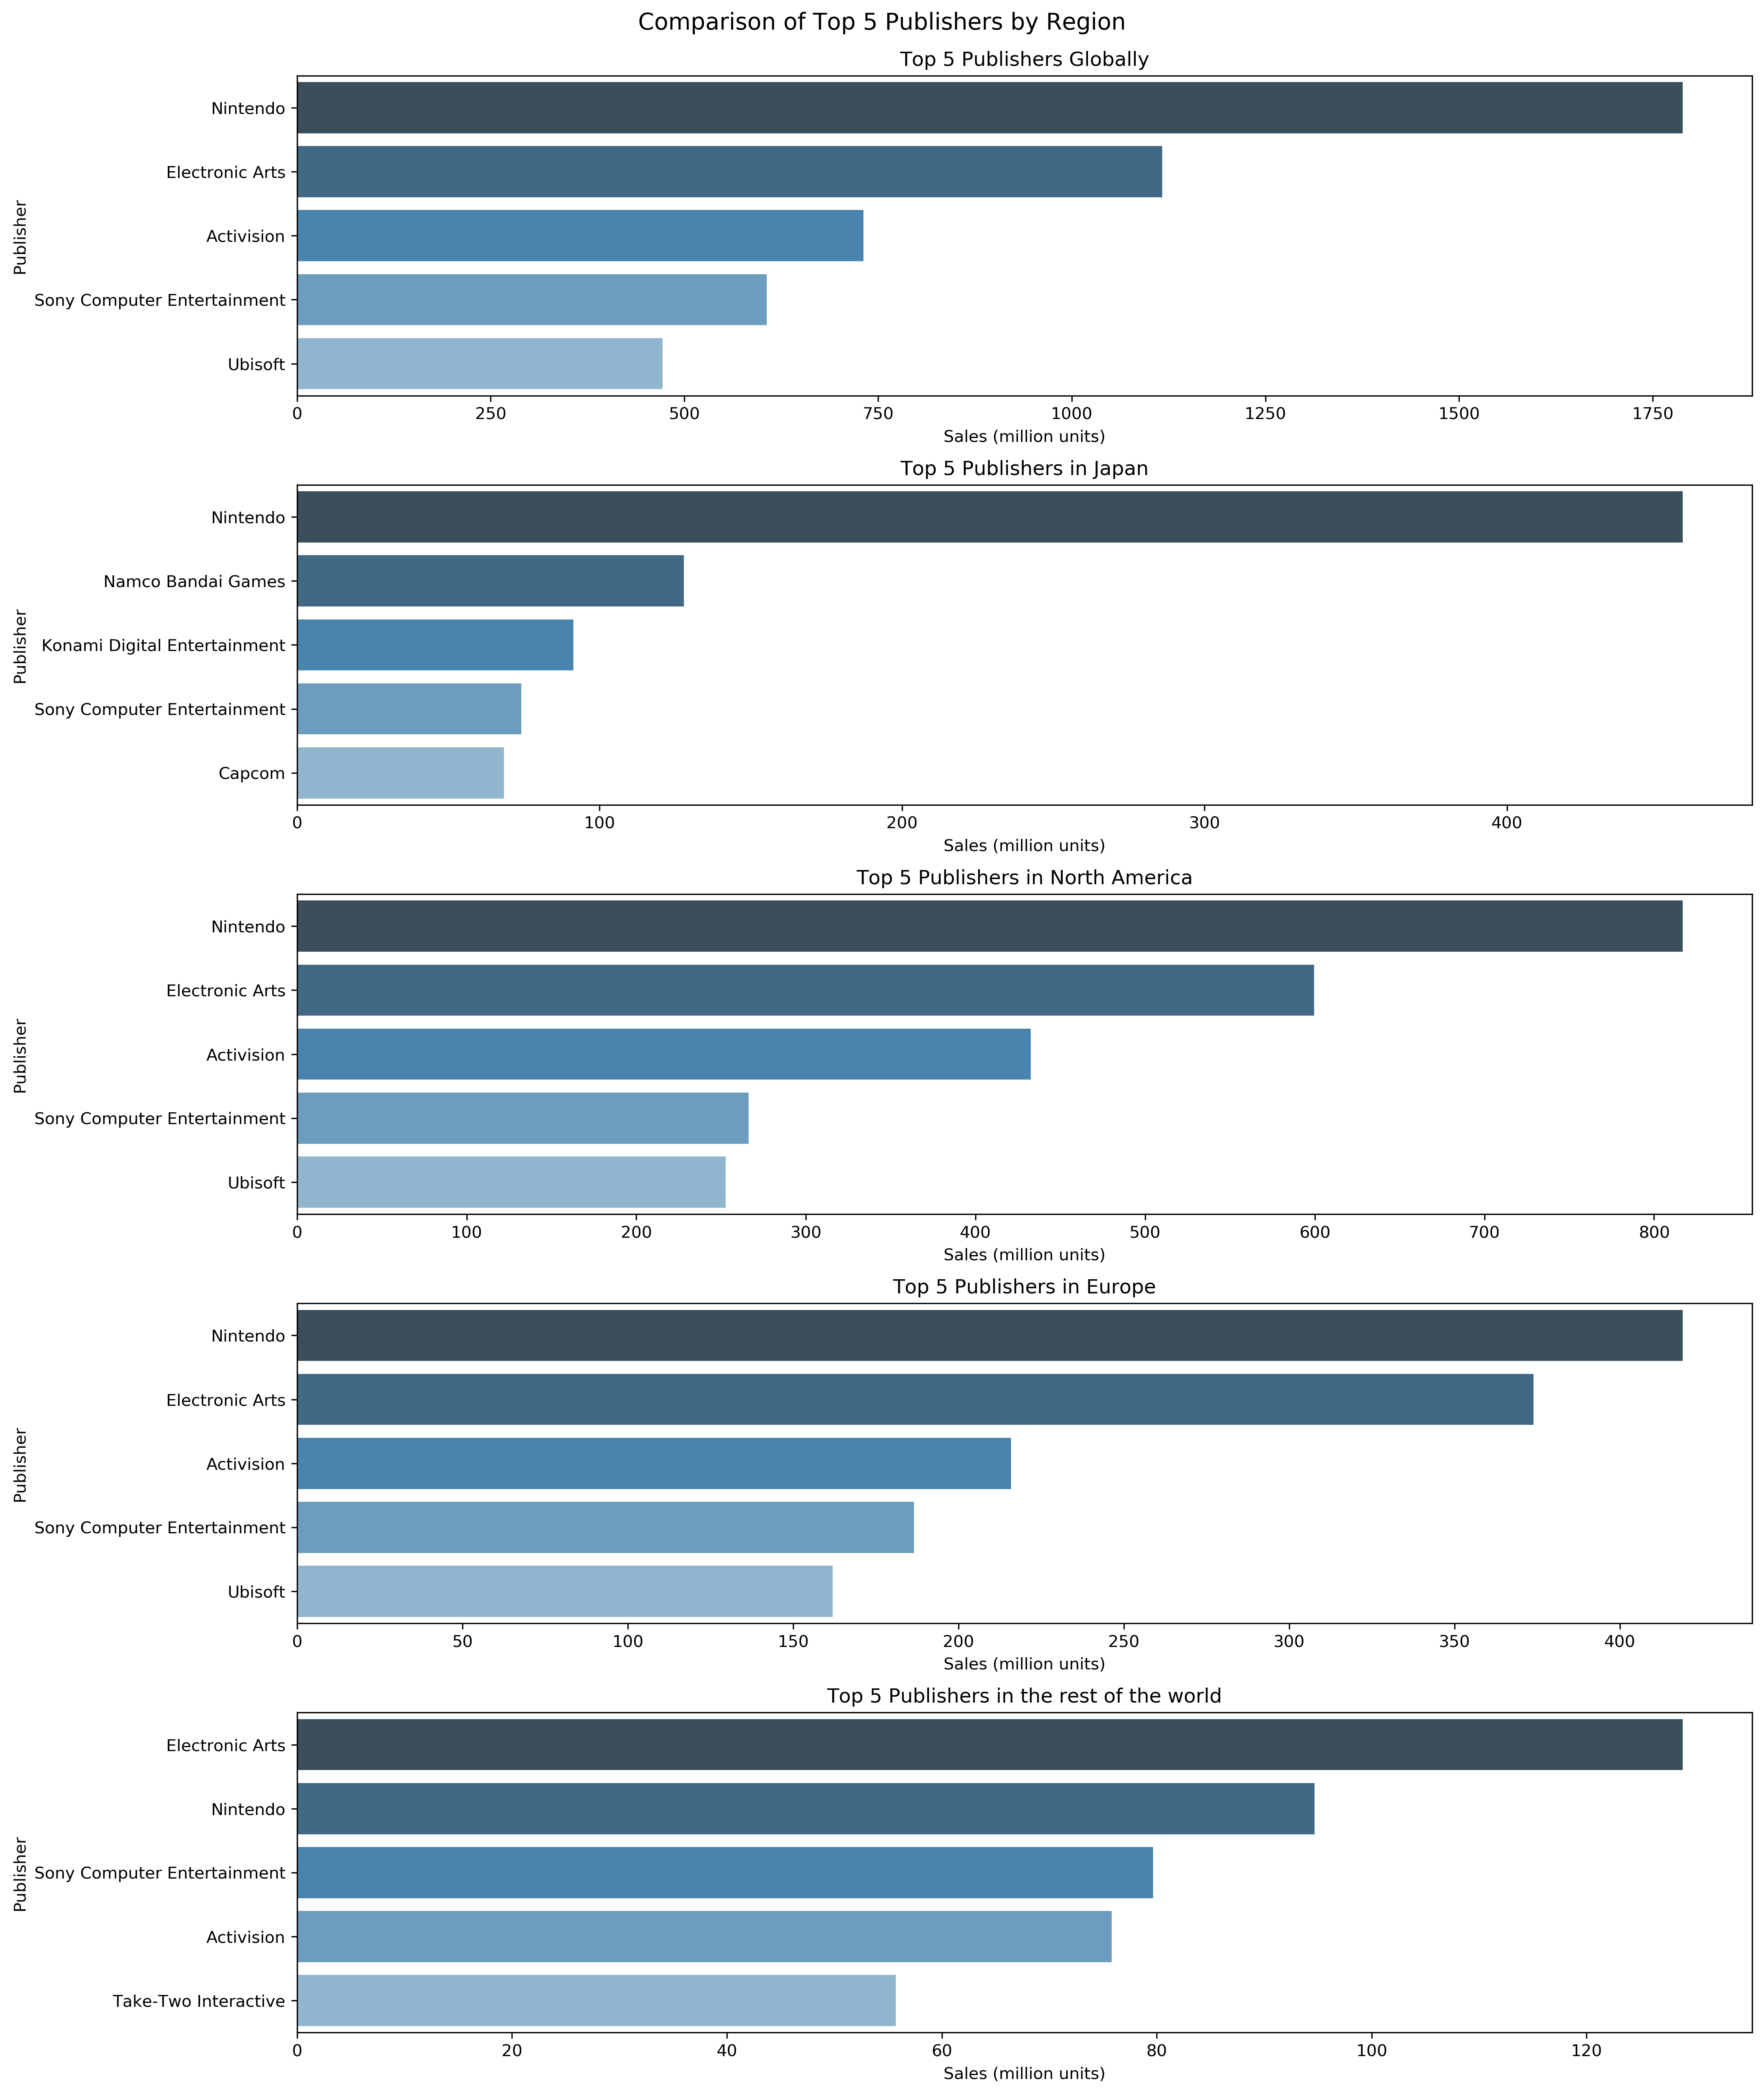

In [10]:
# Data Prep

publisher_JP = (vg[['Publisher','JP_Sales']]
                .groupby(['Publisher'],as_index=False)
                .sum().nlargest(5,'JP_Sales'))

publisher_WW = (vg[['Publisher','Global_Sales']]
                .groupby(['Publisher'],as_index=False)
                .sum().nlargest(5,'Global_Sales'))

publisher_NA = (vg[['Publisher','NA_Sales']]
                .groupby(['Publisher'],as_index=False)
                .sum().nlargest(5,'NA_Sales'))

publisher_EU = (vg[['Publisher','EU_Sales']]
                .groupby(['Publisher'],as_index=False)
                .sum().nlargest(5,'EU_Sales'))

publisher_OT = (vg[['Publisher','Other_Sales']]
                .groupby(['Publisher'],as_index=False)
                .sum().nlargest(5,'Other_Sales'))


# Plotting
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5, ncols=1, 
                                              figsize=(15,18),
                                              dpi=300)
# ax1
sns.barplot(x='Global_Sales',y='Publisher', data=publisher_WW, ax=ax1, palette='Blues_d')
ax1.set_xlabel('Sales (million units)')
ax1.set_ylabel('Publisher')
ax1.set_title('Top 5 Publishers Globally')

# ax2
sns.barplot(x='JP_Sales',y='Publisher', data=publisher_JP, ax=ax2, palette='Blues_d')
ax2.set_xlabel('Sales (million units)')
ax2.set_ylabel('Publisher')
ax2.set_title('Top 5 Publishers in Japan')

# ax3
sns.barplot(x='NA_Sales',y='Publisher', data=publisher_NA, ax=ax3, palette='Blues_d')
ax3.set_xlabel('Sales (million units)')
ax3.set_ylabel('Publisher')
ax3.set_title('Top 5 Publishers in North America')

# ax4
sns.barplot(x='EU_Sales',y='Publisher', data=publisher_EU, ax=ax4, palette='Blues_d')
ax4.set_xlabel('Sales (million units)')
ax4.set_ylabel('Publisher')
ax4.set_title('Top 5 Publishers in Europe')

# ax5
sns.barplot(x='Other_Sales',y='Publisher', data=publisher_OT, ax=ax5, palette='Blues_d')
ax5.set_xlabel('Sales (million units)')
ax5.set_ylabel('Publisher')
ax5.set_title('Top 5 Publishers in the rest of the world')

# Show plot
plt.tight_layout()
plt.suptitle('Comparison of Top 5 Publishers by Region',size=14)
plt.subplots_adjust(top=0.95)
plt.show()

### Top 5 Global Publishers in the World and Top 5 Publishers per Region: Observations

Turns out, `Nintendo` is the top publisher globally. Partitioning it by region, we can see that `Nintendo` is also the top publisher in North America and Europe, but not in the rest of the world. The top publisher for those outside the three main regions is `Electronic Arts`, with `Nintendo` as the second. 

In North America and Europe, this trend is reversed with `Electronic Arts` as the second to `Nintendo`.

Interestingly, `Sony Computer Entertainment` is also a consistent publisher, ranking within the top 5 regardless of region.

### Taking a quick look at Sony Computer Entertainment's Top 10 games to satisfy my curiosity

Aside from `Nintendo`, `Sony Computer Entertainment` is the only publisher who has managed to be a top publisher in Japan and in the rest of the world. At this point, we have esbtablished that Japan have vastly different preferences than the rest of the world. So, what are the top games of `Sony Computer Entertainment` and their `Genre`s that penetrated both Japan and the global market?

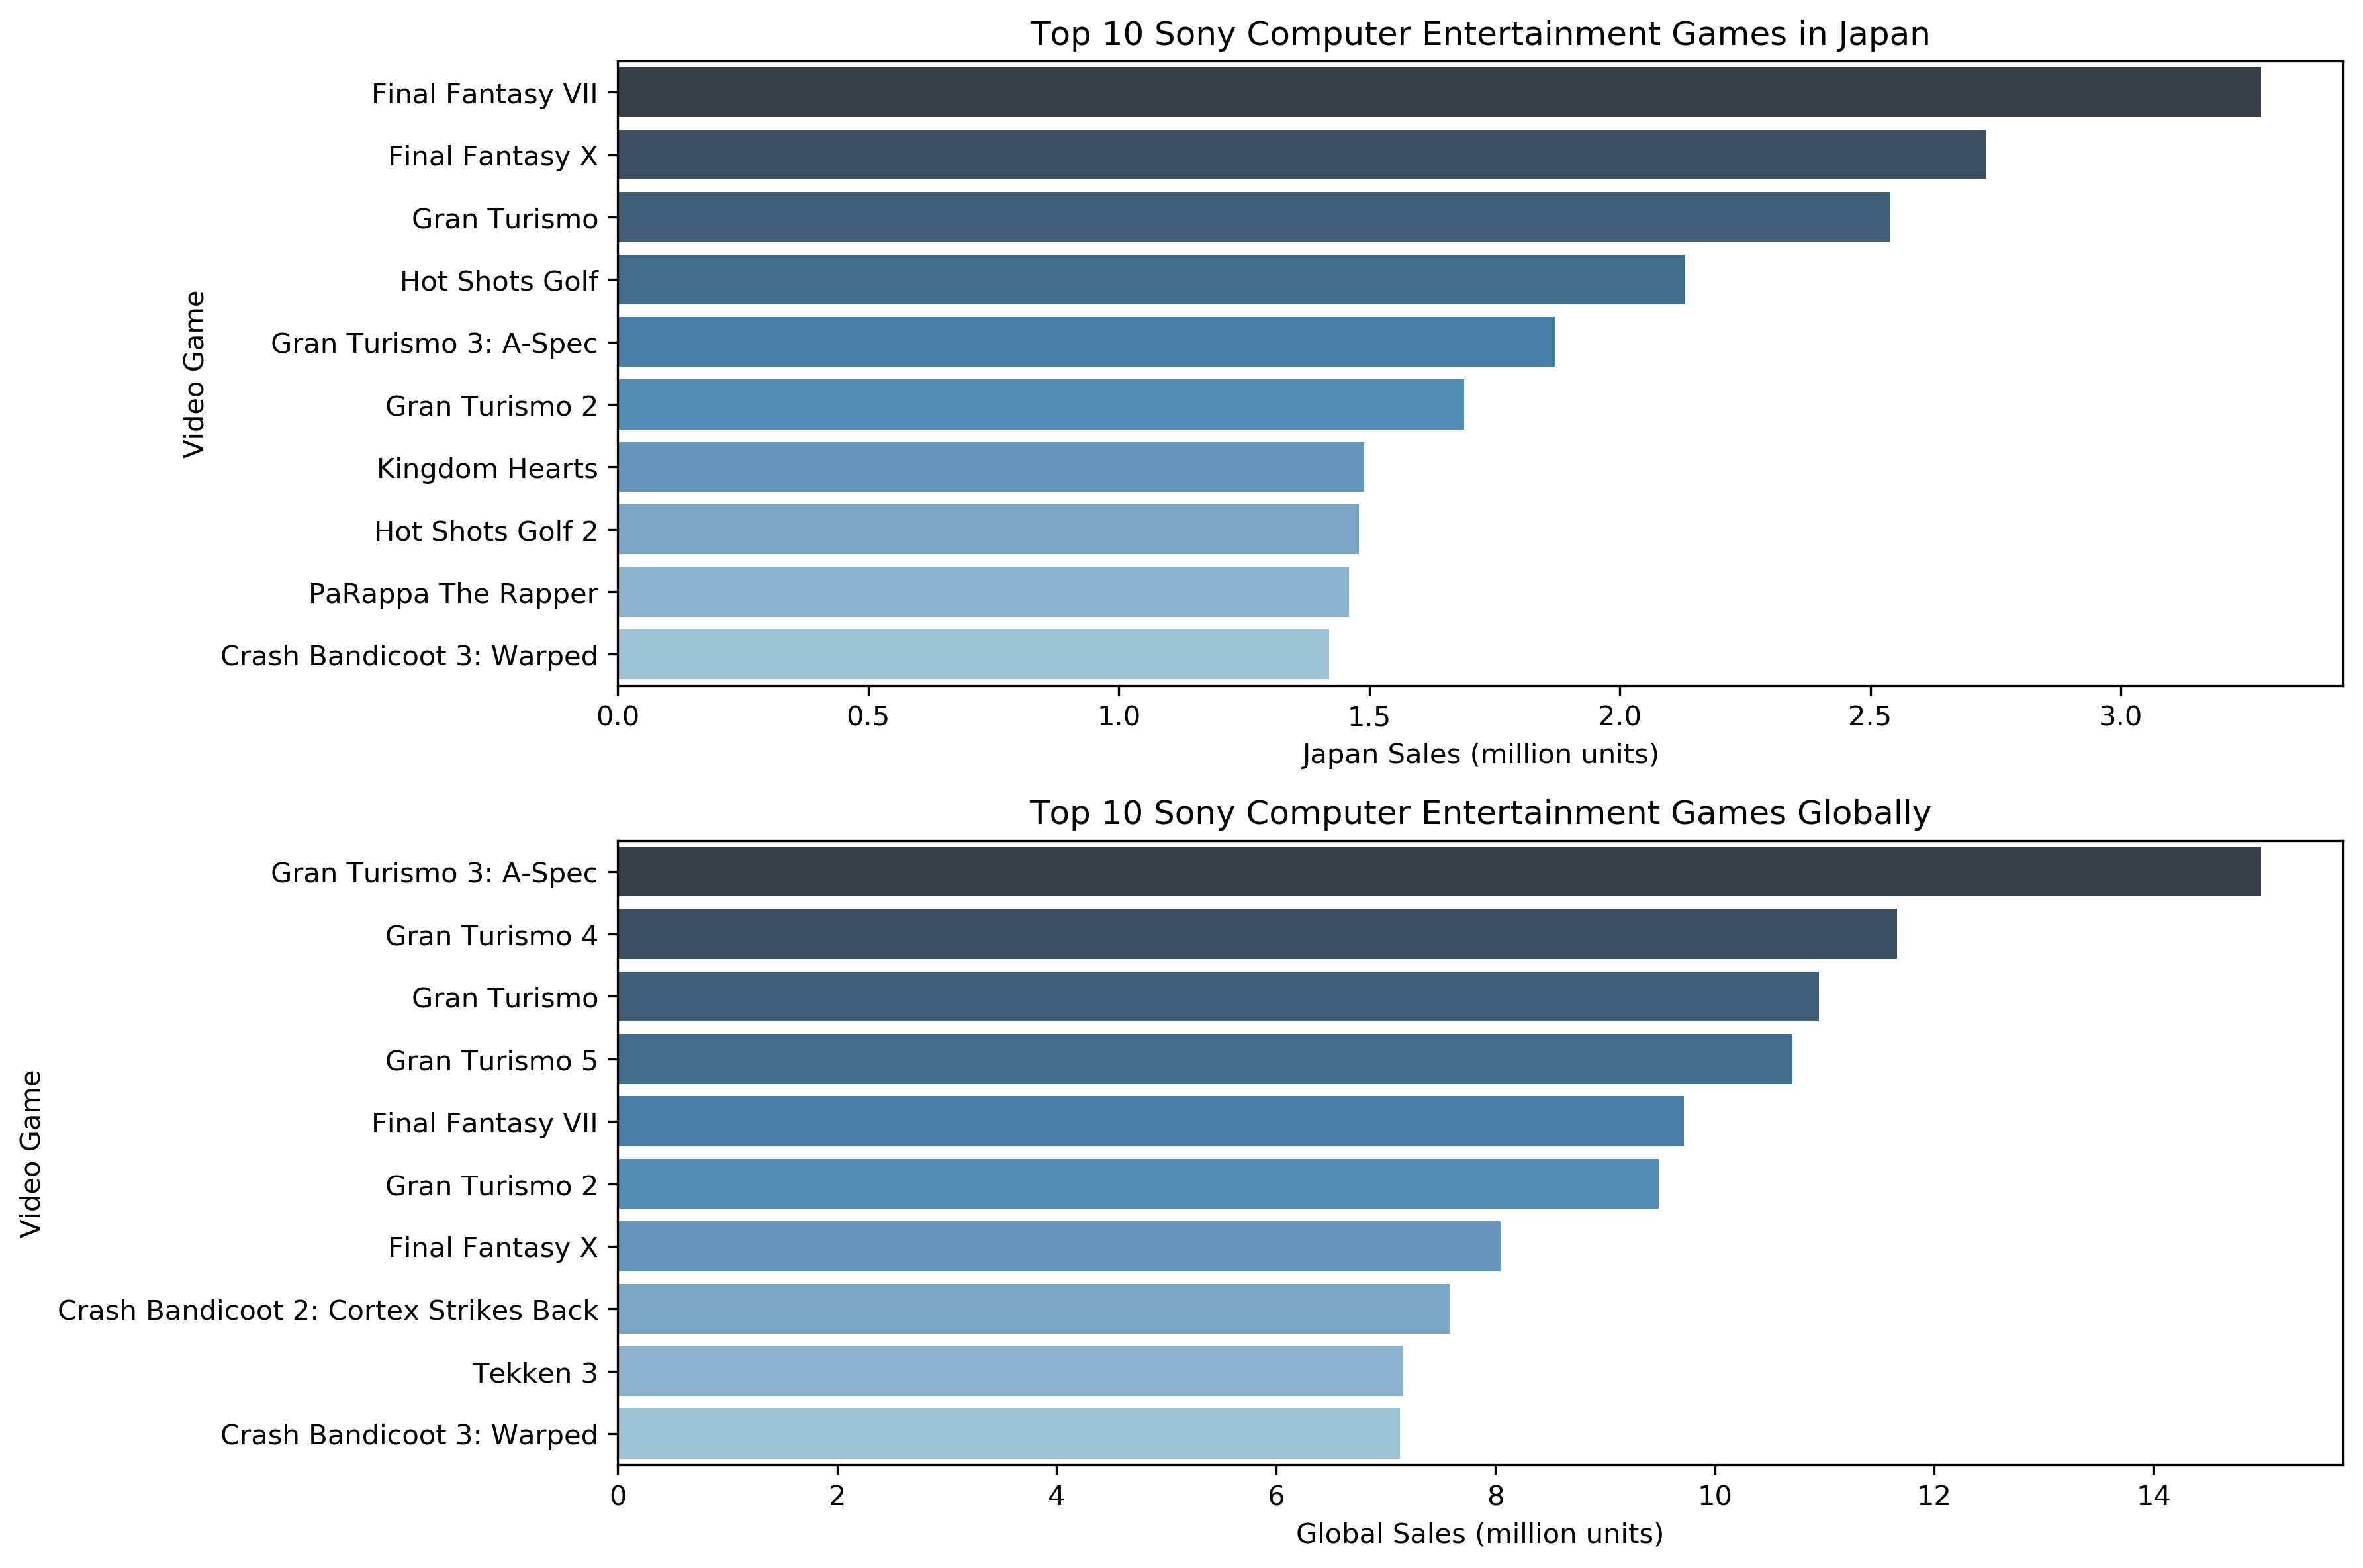

In [11]:
#Data Preparation
top_sony = (vg[['Name','Publisher','Genre', 'Global_Sales', 
                'JP_Sales', 'Developer']])

top_sony_JP = (top_sony
            .loc[top_sony['Publisher'] == 'Sony Computer Entertainment']
            .nlargest(10,'JP_Sales'))

top_sony_GL = (top_sony
            .loc[top_sony['Publisher'] == 'Sony Computer Entertainment']
            .nlargest(10,'Global_Sales'))


#Plotting

fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,8), dpi=300)

sns.barplot(x='JP_Sales',y='Name', data=top_sony_JP, palette='Blues_d', 
            ax=ax1)
ax1.set_xlabel('Japan Sales (million units)')
ax1.set_ylabel('Video Game')
ax1.set_title('Top 10 Sony Computer Entertainment Games in Japan')

sns.barplot(x='Global_Sales',y='Name', data=top_sony_GL, palette='Blues_d',
            ax=ax2)
ax2.set_xlabel('Global Sales (million units)')
ax2.set_ylabel('Video Game')
ax2.set_title('Top 10 Sony Computer Entertainment Games Globally')

plt.tight_layout()
plt.show()

### Quick look at Sony Computer Entertainment Games: Observation and Insight

Results show that there's not a lot of overlap between the games. There are only a few similarities between the two sets:
the `Final Fantasy` games, the `Gran Turismo` games, and `Crash Bandicoot 3: Warped`.

Based on domain knowledge though, I know that the `Final Fantasy` games were not created by `Sony`, rather they are created by `Squaresoft`/`Square Enix`. Here lies the different between `Publisher`s, and `Developer`s. The `Developer`s are the ones responsible for making the game while the role of the `Publisher` is to market, distribute, and sell the games, which is why they are the ones being credited. If we have sufficient `Developer` data, it might be worthwhile to see the distribution of how `Developer`s fare against each other per region. But using the `Publisher`s as our comparison point would also suffice since they are the ones selling the games anyway.

To further illustrate the difference between `Publisher`s, and `Developer`s, if we generate the tables for the graphs above, we can see that while `Sony` distributed and sold these games, they are not the ones who developed and created them. But this aspect may be why they were able to penetrate both markets. Their strength lies in knowing what will sell vs creating what will sell. And they are focusing on the former as their strategy.

In [12]:
# Top Sony games in Japan
top_sony_JP

,Name,Publisher,Genre,Global_Sales,JP_Sales,Developer
65,Final Fantasy VII,Sony Computer Entertainment,Role-Playing,9.72,3.28,SquareSoft
84,Final Fantasy X,Sony Computer Entertainment,Role-Playing,8.05,2.73,SquareSoft
52,Gran Turismo,Sony Computer Entertainment,Racing,10.95,2.54,Polyphony Digital
526,Hot Shots Golf,Sony Computer Entertainment,Sports,2.79,2.13,NaN
28,Gran Turismo 3: A-Spec,Sony Computer Entertainment,Racing,14.98,1.87,Polyphony Digital
67,Gran Turismo 2,Sony Computer Entertainment,Racing,9.49,1.69,Polyphony Digital
132,Kingdom Hearts,Sony Computer Entertainment,Role-Playing,6.40,1.49,SquareSoft
919,Hot Shots Golf 2,Sony Computer Entertainment,Sports,1.88,1.48,NaN
903,PaRappa The Rapper,Sony Computer Entertainment,Misc,1.92,1.46,NanaOn-Sha
109,Crash Bandicoot 3: Warped,Sony Computer Entertainment,Platform,7.13,1.42,Naughty Dog


In [13]:
# Top Sony games globally
top_sony_JP

,Name,Publisher,Genre,Global_Sales,JP_Sales,Developer
65,Final Fantasy VII,Sony Computer Entertainment,Role-Playing,9.72,3.28,SquareSoft
84,Final Fantasy X,Sony Computer Entertainment,Role-Playing,8.05,2.73,SquareSoft
52,Gran Turismo,Sony Computer Entertainment,Racing,10.95,2.54,Polyphony Digital
526,Hot Shots Golf,Sony Computer Entertainment,Sports,2.79,2.13,NaN
28,Gran Turismo 3: A-Spec,Sony Computer Entertainment,Racing,14.98,1.87,Polyphony Digital
67,Gran Turismo 2,Sony Computer Entertainment,Racing,9.49,1.69,Polyphony Digital
132,Kingdom Hearts,Sony Computer Entertainment,Role-Playing,6.40,1.49,SquareSoft
919,Hot Shots Golf 2,Sony Computer Entertainment,Sports,1.88,1.48,NaN
903,PaRappa The Rapper,Sony Computer Entertainment,Misc,1.92,1.46,NanaOn-Sha
109,Crash Bandicoot 3: Warped,Sony Computer Entertainment,Platform,7.13,1.42,Naughty Dog


### Global Sales by Year

Taking a step back from looking at specific regions, publishers, or games, I am want to know the yearly sales look like. Do we see peaks or low points? Are there spikes in the trend, and why?

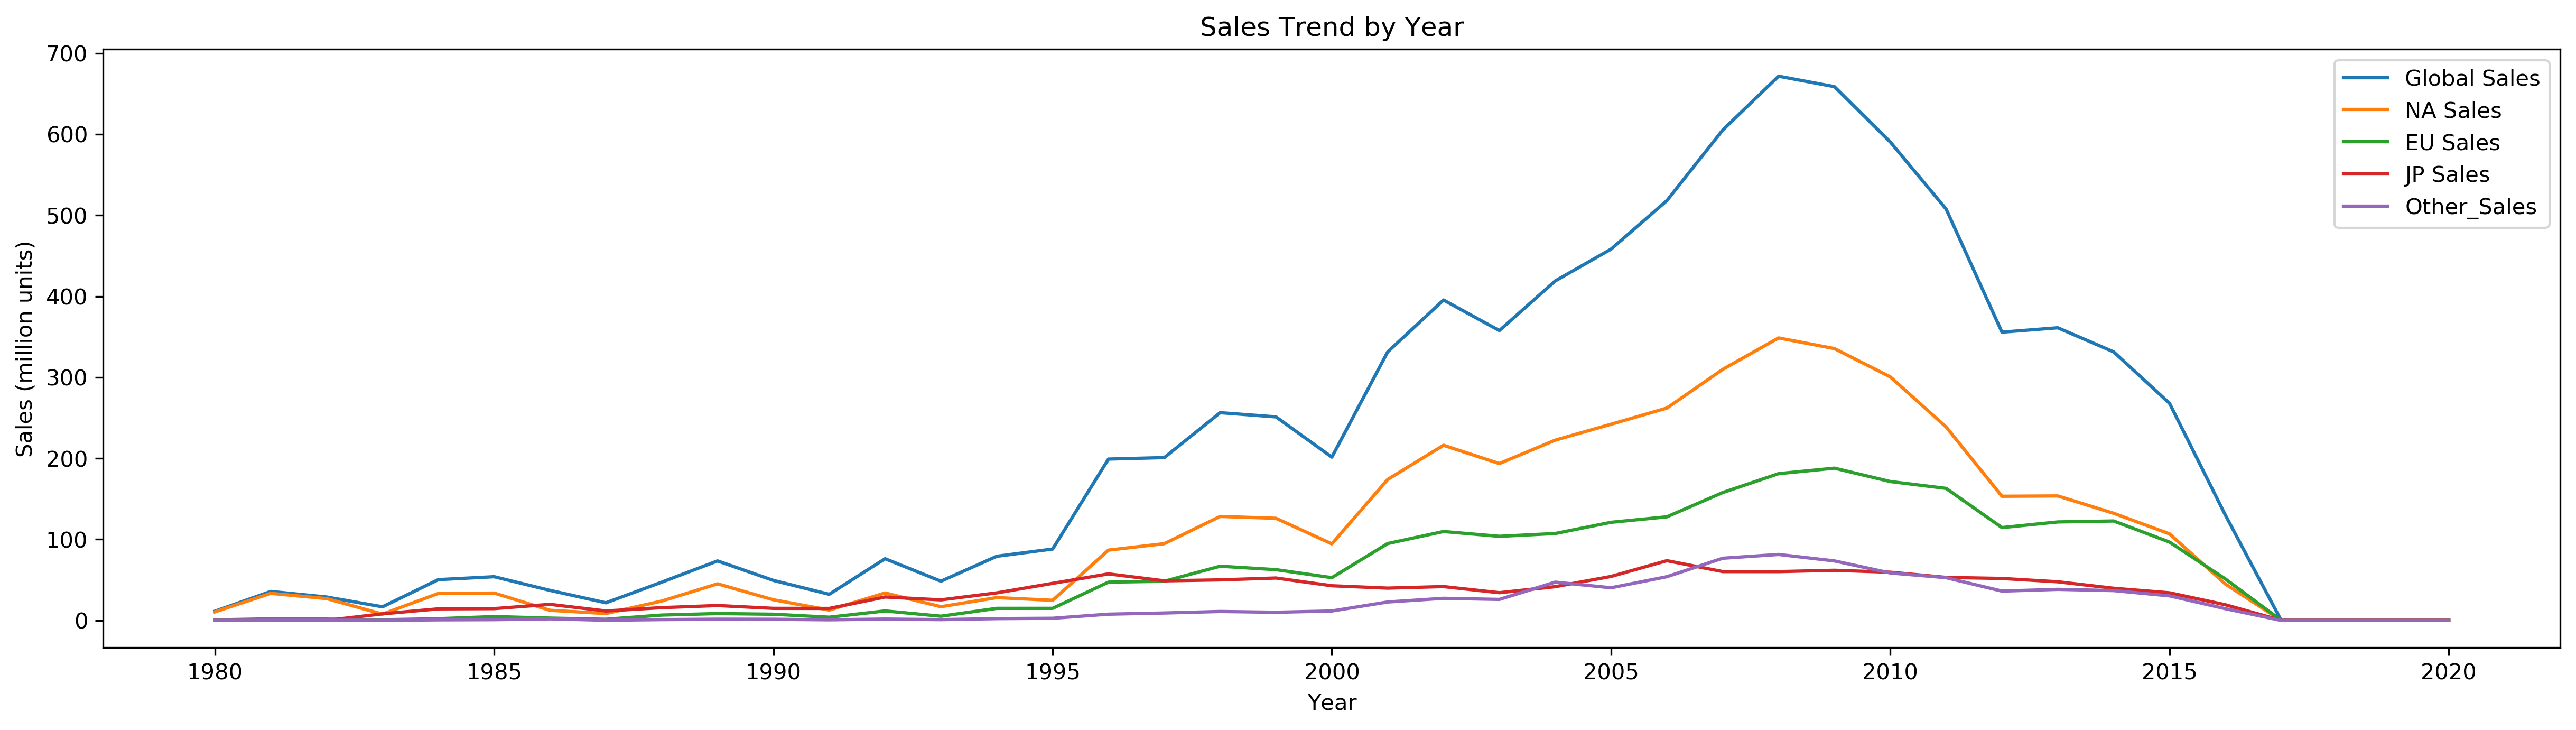

In [14]:
yearly_sales= vg[['Year_of_Release','Global_Sales','NA_Sales','EU_Sales',
                        'JP_Sales','Other_Sales']]

plt.figure(figsize=[20,5], dpi=300)

for region in ['Global_Sales','NA_Sales','EU_Sales',
                        'JP_Sales','Other_Sales']:
    ax = sns.lineplot(y=region, x="Year_of_Release", 
                      ci = None, data=yearly_sales, 
                      legend="full", estimator=np.sum)
ax.set_title("Sales Trend by Year")
ax.set_xlabel("Year")
ax.set_ylabel("Sales (million units)")
ax.legend(['Global Sales', 'NA Sales','EU Sales','JP Sales', 'Other_Sales'])

plt.show()

## Global Sales by Year: Observations and Insights

It's expected that the trend of the `NA_Sales` will determine how the `Global_Sales` by year will turn out. We can see in 1995 that there's a spike in sales, probably owing to the release of popular video game consoles such as the Sony Playstation, Nintendo 64 etc. This spike is continuously increasing until 2000, where there's a slight dip. I'm not sure what caused this as I was only 5 years old at this point in time, but the trend also picked up until around 2008, where we then saw a downward trend in sales. The downward trend from 2008 onwards can probably be attributed to games taking longer time to complete, the arrival of free to play online games, and the focus of developers to increase replayability of games. 

Aside from the global trend, it's also interesting to see how the trend in Japan does not conform with any of the trends in elsewhere. It is as if they are doing their own thing and they are moving at their own pace. With the differences in taste and preference that we saw earlier (genre preference, publisher preference), this inference is not too far of a reach.

### Sales by Platform from Year 2000 onwards

Aside from games and the sales, I'm also curious to see which platforms from the year 2000 onwards have the most sales. In gaming, the platforms/consoles are as important as the games and publishers themselves since they affect how customers experience these games.

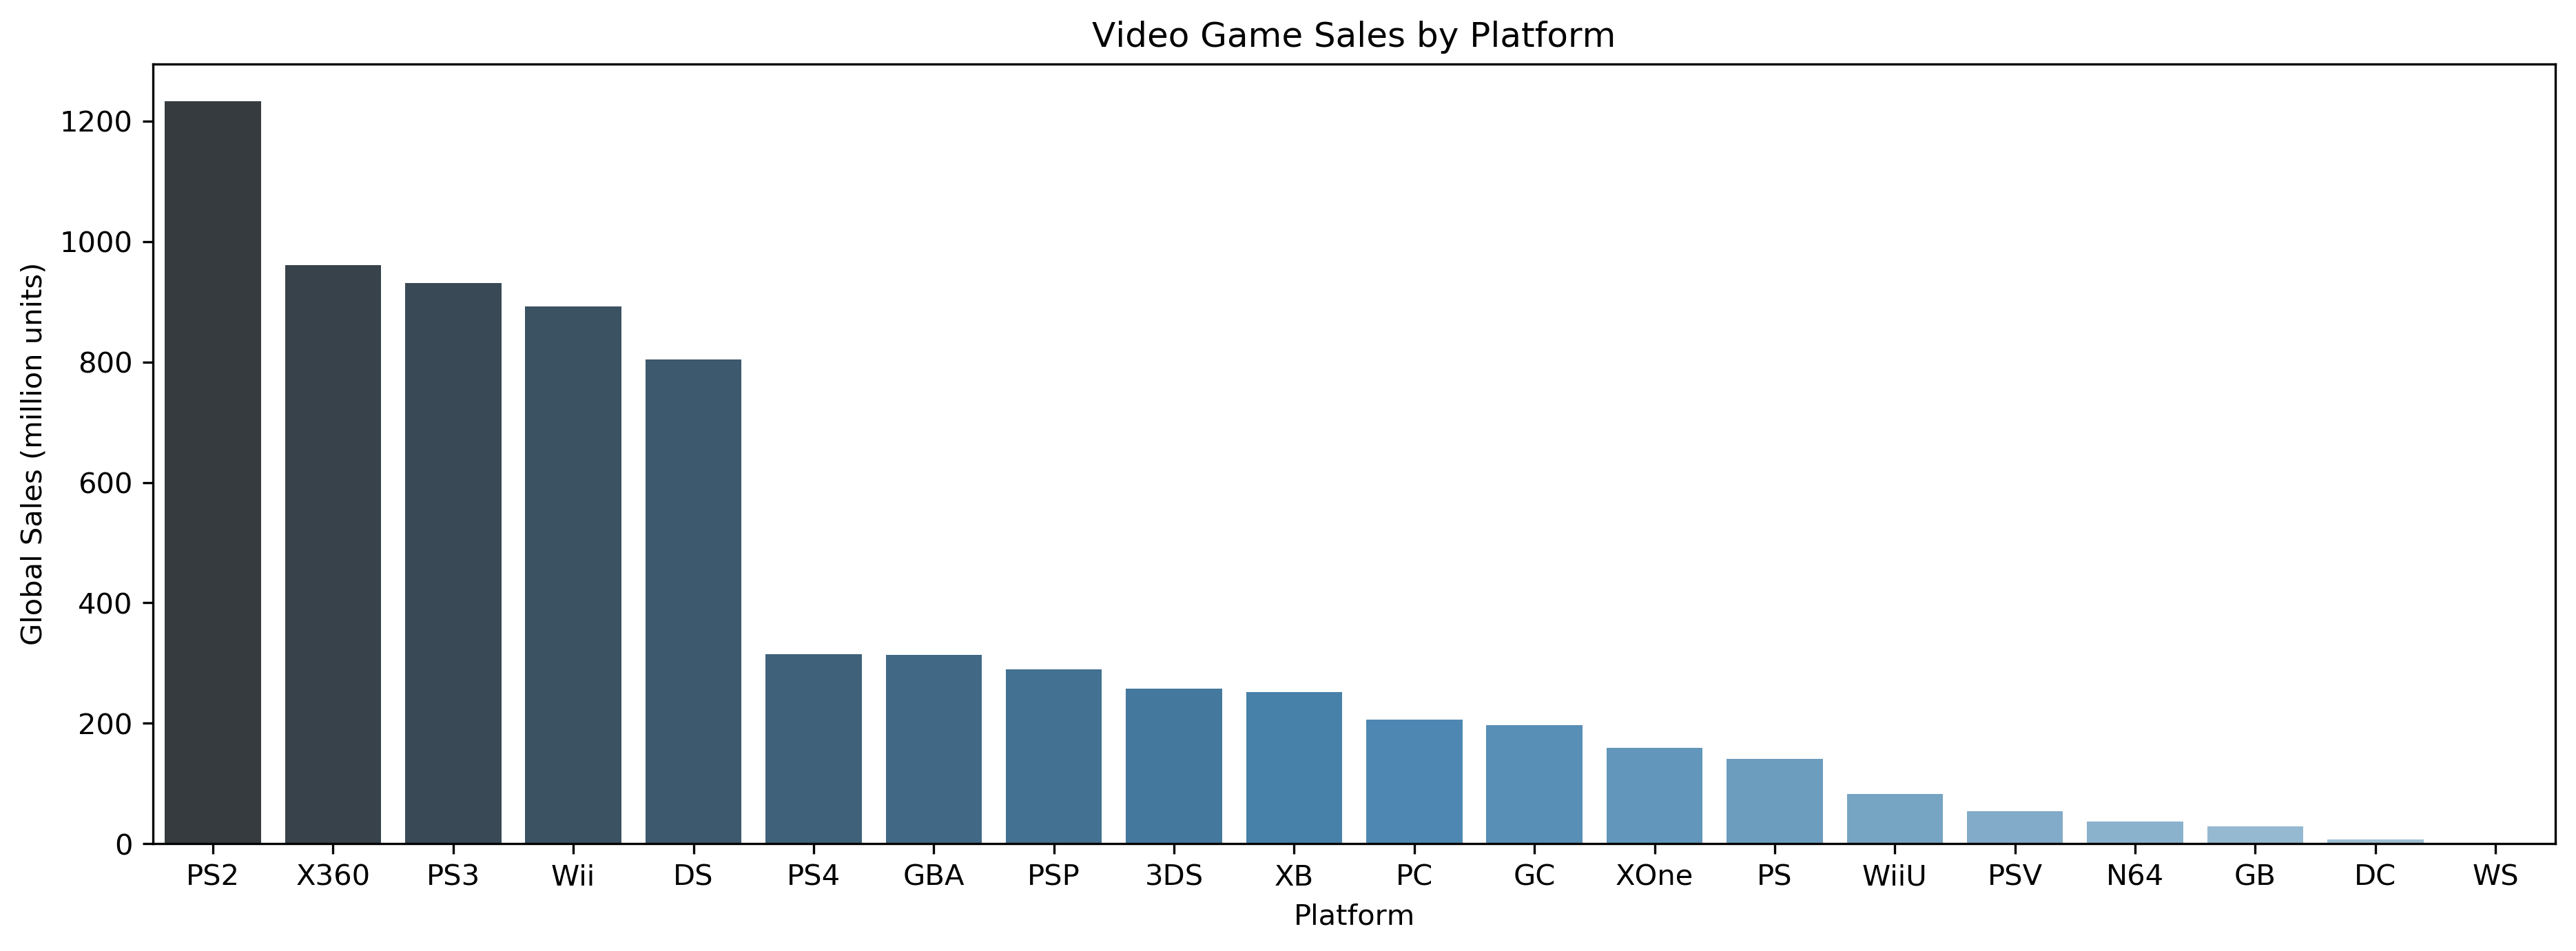

In [15]:
platform = (vg.loc[vg.Year_of_Release >= 2000][['Platform',
                                               'Global_Sales']])
platform = (platform.groupby('Platform').sum()
            .sort_values('Global_Sales', ascending=False).reset_index())

plt.figure(figsize=[15,5], dpi=300)
sns.barplot(x='Platform', y='Global_Sales', data=platform, palette="Blues_d")
plt.title('Video Game Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales (million units)')
plt.show()

### Sales by Platform from Year 2000 onwards: Observations and Insights

For the past 20 years, the platform with the most sales is the `PS2`. This console stands for PlayStation 2, and is related to the `PSP`,`PS3` and `PS4` consoles, all of which are owned by `Sony`. The top sales in these consoles may help explain as to why they were able to penetrate globally, including Japan. The `X360` stands for the X-Box 360 and is owned by `Microsoft.` They also own other consoles, such as the `XB`, `XOne` etc. On the other hand, the `Wii`, `DS`, `GBA`, `3DS` are owned by `Nintendo`. 

Most, if not all, of the consoles in this graph are owned only by three corporations: `Sony`, `Microsoft`, and `Nintendo`. And knowing this aspect adds another layer on how we can potentially use the data, aside from using just the `Identifiers` and the `Sales Data`. 

Relating this graph to the current times, these three corporations are the primary drives of what is known as the console wars in gaming.

## Storytelling

With our EDA above, we now know how we can potentially use the data in the dataset to tell a story. I'll be picking one true to life scenario (based on my experience) with a few adjustments just to expand the scope.

### What game and platform can we buy and hopefully not regret our choice?

For this particular scenario, let's dial back a bit and pretend it's the year 2008 in the Philippines. Without knowing anything about games but with knowledge on data analysis and data visualization, we are provided this dataset. 

Our goal is to buy a console and a game that we will not regret based on our data at hand. From the EDA earlier, we know howe we can potentially use each data column. We then decided to follow these steps:find the most popular console in 2008,  then find the most popular genre in that console, and then take the top 5 most popular games in that genre, all in terms of sales. Then finally, we will choose the game with the highest critic score out of the 5 narrowed down games.

Why not select only the game with the highest number of sales in our year and region? This is because the choice of console significantly affects our experience with games. Consoles with high selling rates are popular for a reason: they offer a substantive layer to playing games and enhances the experience.

With this, we then decided to deep dive into our data and perform our analysis:

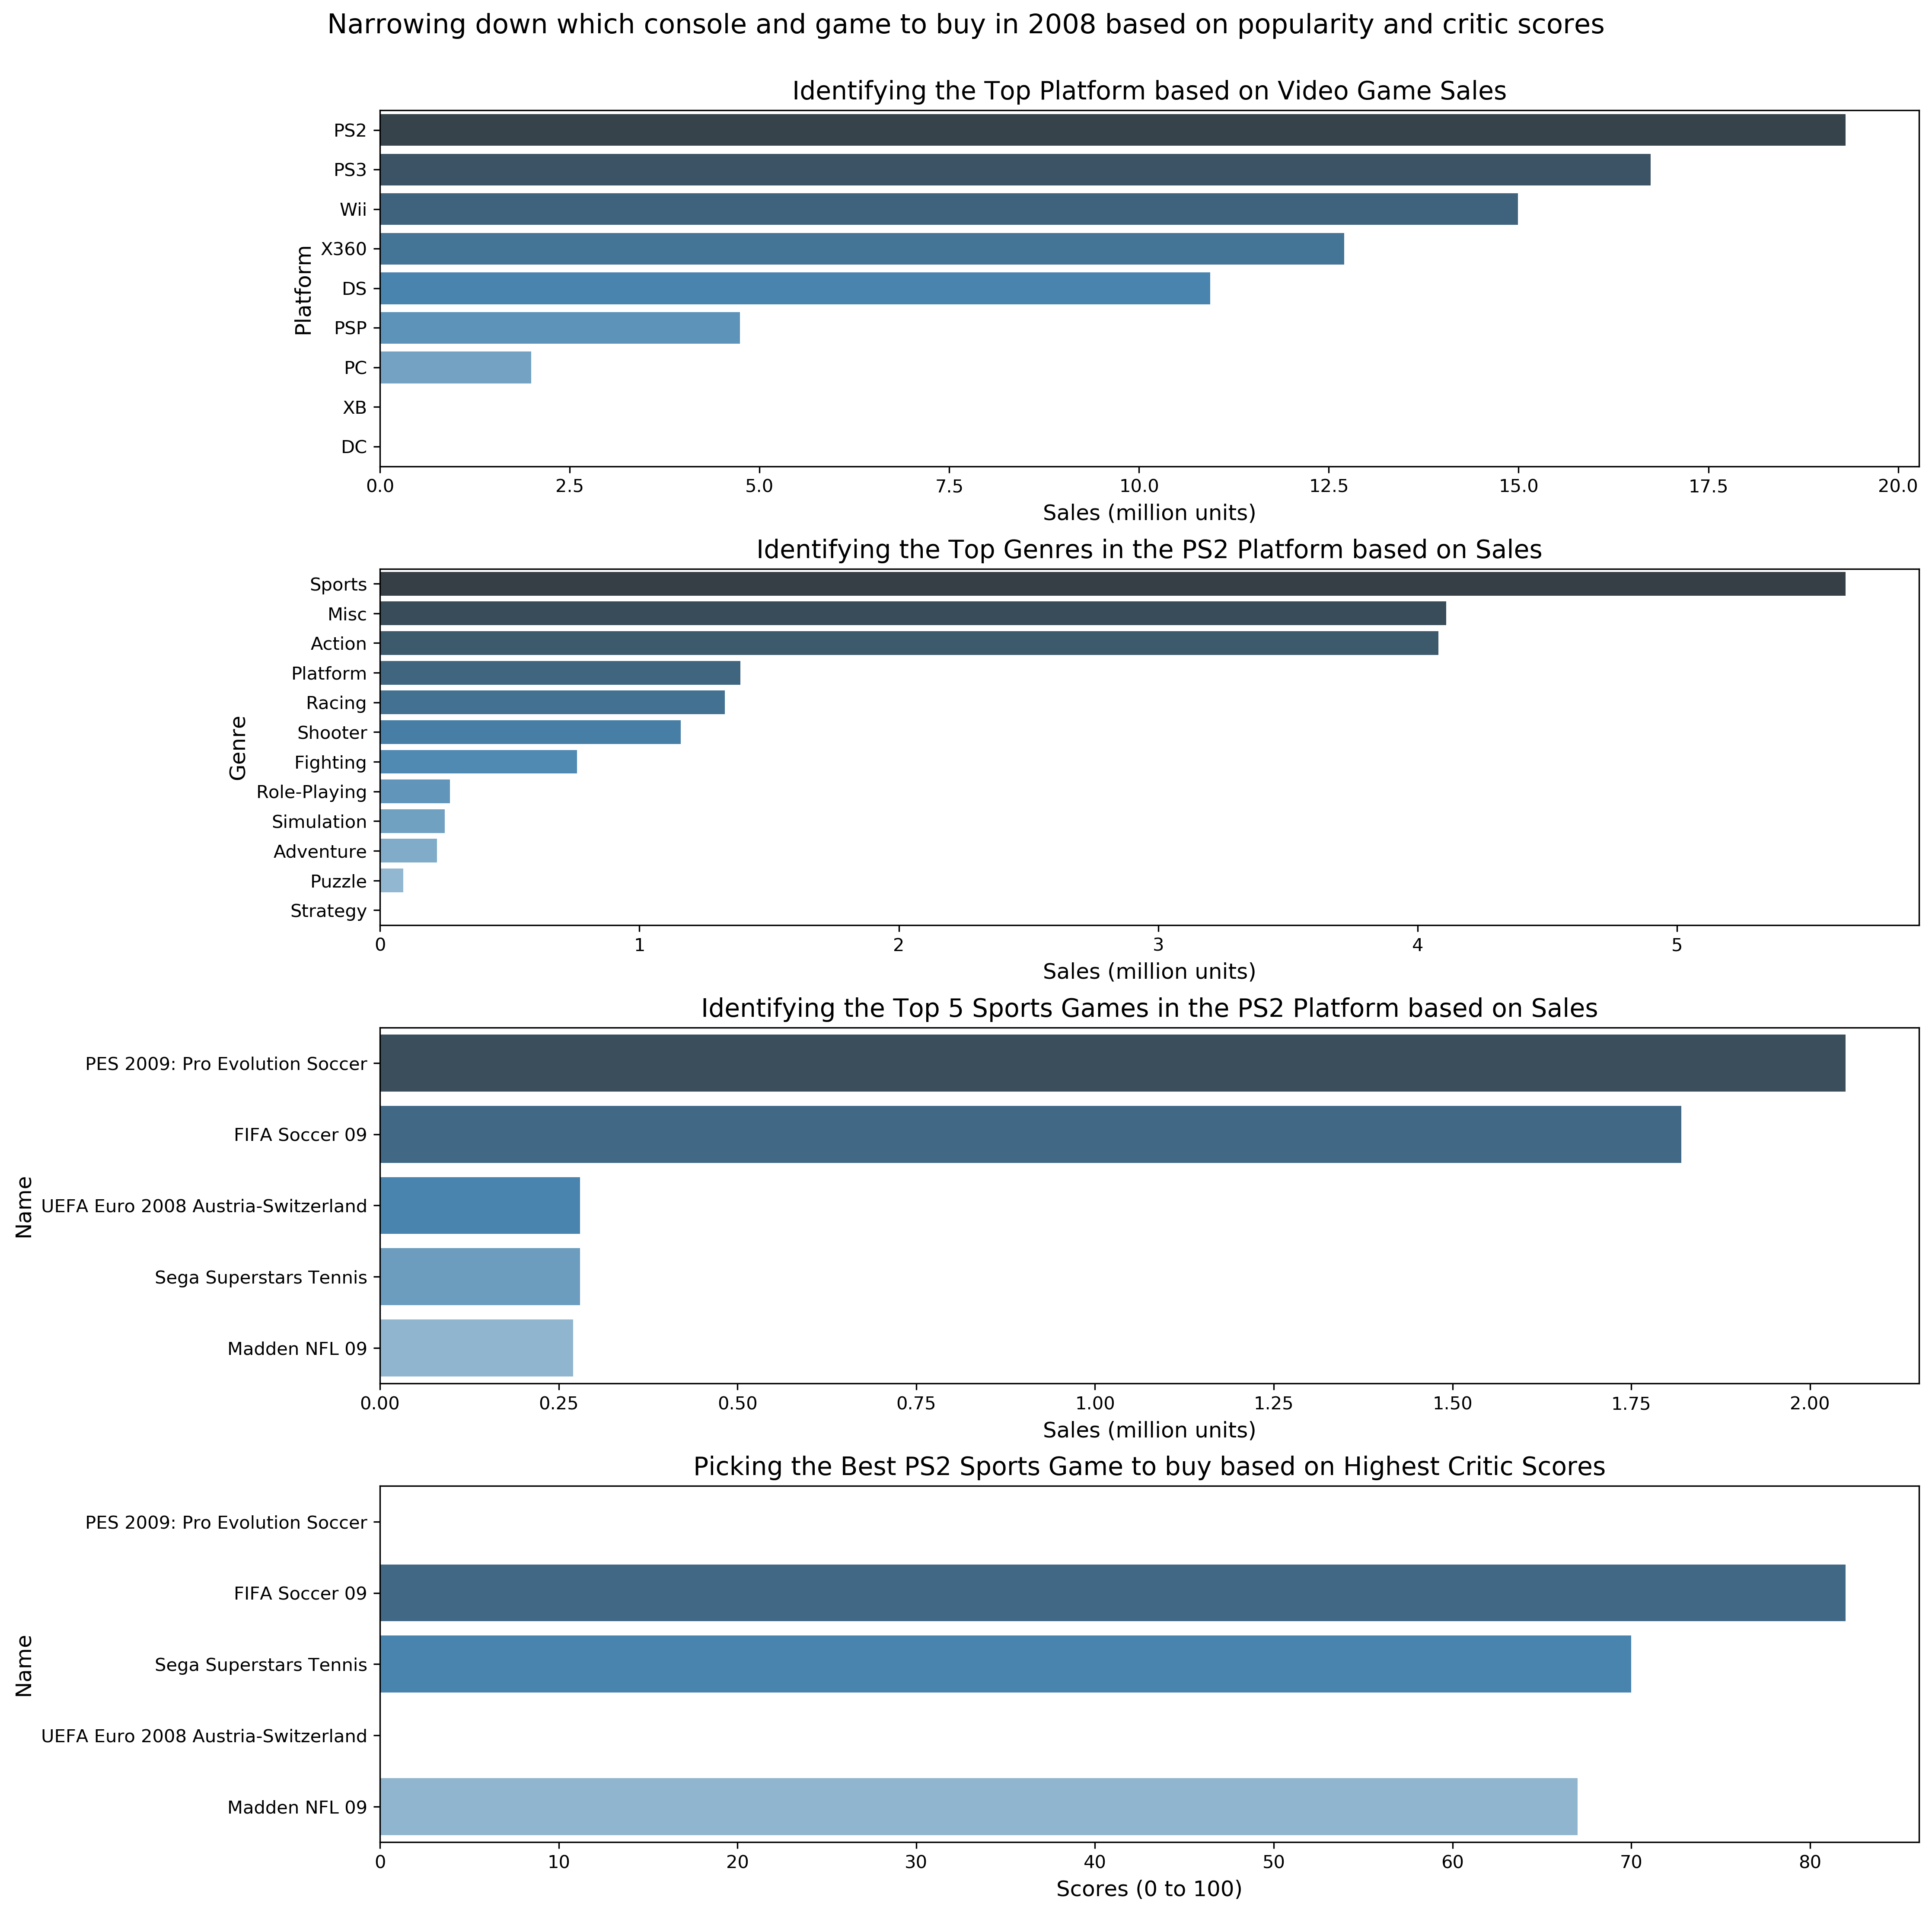

In [16]:
PH_2008 = vg[vg.Year_of_Release == 2008][['Name', 'Platform', 
                                          'Year_of_Release', 'Genre', 
                                          'Other_Sales', 'Critic_Score']]

# Setting up the multiplot / final viz
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, 
                                             figsize=(15,15), dpi=300)

plt.suptitle('Narrowing down which console and game to buy in 2008 based on popularity and critic scores', size=15)

# Identifying the top console:

platform = (PH_2008.groupby('Platform').sum()
            .sort_values('Other_Sales', ascending=False).reset_index())

sns.barplot(x='Other_Sales', y='Platform', data=platform, 
            ax = ax1, palette="Blues_d")
ax1.set_title('Identifying the Top Platform based on Video Game Sales', size=14)
ax1.set_xlabel('Sales (million units)', size=12)
ax1.set_ylabel('Platform', size=12)

# Finding the most popular genre in the identified console
genre = (PH_2008[PH_2008.Platform == 'PS2'][['Genre','Other_Sales']]
         .groupby('Genre').sum()
         .sort_values('Other_Sales', ascending=False)
         .reset_index())

sns.barplot(x='Other_Sales', y='Genre', data=genre, 
            ax = ax2, palette="Blues_d")
ax2.set_title('Identifying the Top Genres in the PS2 Platform based on Sales', size=14)
ax2.set_xlabel('Sales (million units)', size=12)
ax2.set_ylabel('Genre', size=12)

#Top 5 Games in the identified genre
games = (PH_2008[(PH_2008.Genre == 'Sports') & (PH_2008.Platform == 'PS2')][['Name','Other_Sales']]
         .groupby('Name').sum()
         .sort_values('Other_Sales', ascending=False)
         .reset_index()).head(5)

sns.barplot(x='Other_Sales', y='Name', data=games, 
            ax=ax3, palette="Blues_d")
ax3.set_title('Identifying the Top 5 Sports Games in the PS2 Platform based on Sales', size=14)
ax3.set_xlabel('Sales (million units)', size=12)
ax3.set_ylabel('Name', size=12)

# Critic score for the 5 Games
games_with_scores = (games.merge(PH_2008[(PH_2008.Genre == 'Sports') & (PH_2008.Platform == 'PS2')]
                                 [['Name','Critic_Score']], 
                                 how='inner', on='Name')
                     .sort_values(['Other_Sales','Critic_Score'],
                                  ascending=False)
                     .drop_duplicates(subset='Name'))

sns.barplot(x='Critic_Score', y='Name', data=games_with_scores, 
            ax=ax4, palette="Blues_d")
ax4.set_title('Picking the Best PS2 Sports Game to buy based on Highest Critic Scores', size=14)
ax4.set_xlabel('Scores (0 to 100)', size=12)
ax4.set_ylabel('Name', size=12)

#Plotting
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

### Answering the question of what game and platform to buy:

Following the steps outlined above, we used the sales data where Philippines is included: `Other_Sales`. From our analysis, we have discovered that in the year 2008, the most popular platform or console is the `PS2`, with around ~19 million video game sales. It is followed by the `PS3` with a close ~17 million video game sales, but we're sticking with the PS2 this time because of it's better popularity

After narrowing down the console, we identified that for PS2 games, the most popular are `Sports` games, with around 6 million sales. The genre that ranked next is `Misc` with 4 million sales, but we don't want to take our chances with an unknown genre, that's why we're going with the `Sports` genre.

Further narrowing down the dataset, we found that the top 5 `Sports` games are as follows, together with their `Critic_Score`:

|Name|Sales (million units)|Critic Scores|
|:---|:---:|:---:|
|PES 2009: Pro Evolution Soccer|2.05|No Rating|
|FIFA Soccer 09|1.82|82.0|
|Sega Superstars Tennis|0.28|70.0|
|UEFA Euro 2008 Austria-Switzerland|0.28|No Rating|
|Madden NFL 09	|0.27	|67.0|

Only 3 out of the 5 games have `Critic_Score`s. The game with most sales unfortunately do not have a critic rating. Following our process, we will skip this. Luckily, the 2nd most popular game is also the highest rated game. Seeing no potential conflict in the data analysis we did, we happily went to the nearest game store, bought a `PS2` and `FIFA Soccer 09`. We then played football to our hearts' contents, occasionally playing with friends and siblings, and destroying them in the process as you have the advantage of owning the console and having more practice than them.

A few years down the road, we will repeat the process for a new set of consoles and a new set of games, hopefully there's a robust dataset showing the sales data and genre so we can make better and more accurate decisions.

### Side Note on how the experience will differ if we just picked the game with highest sales:

Looking at the table below, if we only picked the game with highest sales, we will get `Mario Kart Wii` on the `Wii`. The overall experience and happiness we can get by following this route may be an entirely different one compared to the methodology proposed above as the two consoles offer different experiences. 

If we compare this choice to the one we made above, while both games have the same critic rating, the `Wii` ranks 3rd on popularity compared to the `PS2`, and how it can affect the experience, is usually dependent on the person playing the game.

This is an example of things can drastically change by incorporating the `Platform` or console layer in the decision making process.

In [17]:
PH_2008.sort_values('Other_Sales',ascending=False)

,Name,Platform,Year_of_Release,Genre,Other_Sales,Critic_Score
2,Mario Kart Wii,Wii,2008.0,Racing,3.29,82.0
617,PES 2009: Pro Evolution Soccer,PS2,2008.0,Sports,2.05,NaN
699,FIFA Soccer 09,PS2,2008.0,Sports,1.82,82.0
57,Grand Theft Auto IV,PS3,2008.0,Action,1.61,98.0
1481,World of Warcraft: Wrath of the Lich King,PC,2008.0,Role-Playing,1.18,91.0
...,...,...,...,...,...,...
13024,Pony Friends: Mini Breeds Edition,DS,2008.0,Simulation,0.00,NaN
13021,Pro Yakyuu Spirits 5 Kanzenban,PS2,2008.0,Sports,0.00,NaN
13019,Dreamer Series: Puppy Trainer,DS,2008.0,Simulation,0.00,NaN
12999,Jake Power: Policeman,DS,2008.0,Adventure,0.00,NaN
